# LOAD package

In [1]:
from astropy.io import fits
import numpy as np
from multiprocessing import Process
from sklearn.neighbors import BallTree
from astropy.cosmology import FlatLambdaCDM
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from astropy.table import Table,Column,hstack,vstack
from astropy.io import ascii
import os
import matplotlib.colors as mcolors

In [2]:
from astropy.cosmology import FlatLambdaCDM,z_at_value
cosmo = FlatLambdaCDM(H0 = 67.74,Om0 = 0.3089,Ob0 = 0.0486)
import matplotlib.pyplot as plt
import astropy.units as u
import pandas as pd

In [3]:
import seaborn as sns
sns.set()

# VVDS DEEP

In [3]:
SED_Para = ['IDENT','SCALE_BEST','MOD_BEST','EXTLAW_BEST','EBV_BEST','CHI_BEST','NBAND_USED', \
            'AGE_BEST','AGE_INF','AGE_MED','AGE_SUP','MASS_BEST','MASS_INF','MASS_MED','MASS_SUP',\
            'SFR_BEST','SFR_INF','SFR_MED','SFR_SUP','SSFR_BEST','SSFR_INF','SSFR_MED','SSFR_SUP', \
            'B_OBS','V_OBS','R_OBS','I_OBS','u_OBS','g_OBS','r_OBS','i_OBS','z_OBS',\
            'ERR_B_OBS','ERR_V_OBS','ERR_R_OBS','ERR_I_OBS','ERR_u_OBS','ERR_g_OBS','ERR_r_OBS','ERR_i_OBS','ERR_z_OBS',\
            'B_MOD','V_MOD','R_MOD','I_MOD','u_MOD','g_MOD','r_MOD','i_MOD','z_MOD',\
            'CONTEXT','ZSPEC',\
            'B_ABS','V_ABS','R_ABS','I_ABS','u_ABS','g_ABS','r_ABS','i_ABS','z_ABS',\
            'Z_MAX']



deep = pd.read_table('/home/hygao/research/LePHARE/lephare_dev/zy_VVDS_deep_BVRIugriz/VVDS_deep_BVRIugriz.out',\
                              sep='\s+',skiprows=59,header=None,names=SED_Para,index_col=False)

In [4]:
zmax_deep = np.array(deep['Z_MAX'])
redshift_deep = np.array(deep['ZSPEC'])
# u = np.array(deep['u_ABS'])
# r = np.array(deep['r_ABS'])
z = np.array(deep['z_OBS'])

In [86]:
np.min(z)

-99.0

In [30]:
np.where(r==-99.99)

(array([4518]),)

In [29]:
redshift_deep[4518]

0.0195

In [5]:
index = ((u>-99)&(r>-99))
zmax_deep = zmax_deep[index]
redshift_deep = redshift_deep[index]
u = u[index]
r = r[index]
u_r = u-r

TypeError: '>' not supported between instances of 'module' and 'int'

In [15]:
index = ((redshift_deep>=0.5)&(redshift_deep<=0.7))
zmax_deep = zmax_deep[index]
redshift_deep = redshift_deep[index]
u = u[index]
r = r[index]
u_r = u_r[index]

In [17]:
u_r = u-r

In [6]:
redshift_deep.shape

(8153,)

In [6]:
cigale_deep = Table.read("/home/yunzheng/PAC/code/VVDS_desi/VVDS_SED_DEEP/deep_BVRIugriz/out/results.fits")

In [7]:
cigale_deep.columns

<TableColumns names=('id','bayes.param.restframe_Lnu(DECam.g)','bayes.param.restframe_Lnu(DECam.g)_err','bayes.param.restframe_Lnu(DECam.r)','bayes.param.restframe_Lnu(DECam.r)_err','bayes.param.restframe_Lnu(sdss.gp)','bayes.param.restframe_Lnu(sdss.gp)_err','bayes.param.restframe_Lnu(sdss.rp)','bayes.param.restframe_Lnu(sdss.rp)_err','bayes.param.restframe_Lnu(sdss.up)','bayes.param.restframe_Lnu(sdss.up)_err','bayes.param.restframe_Lnu(subaru.hsc.g)','bayes.param.restframe_Lnu(subaru.hsc.g)_err','bayes.param.restframe_Lnu(subaru.hsc.r)','bayes.param.restframe_Lnu(subaru.hsc.r)_err','bayes.stellar.m_star','bayes.stellar.m_star_err','bayes.subaru.hsc.g','bayes.subaru.hsc.g_err','bayes.subaru.hsc.r','bayes.subaru.hsc.r_err','best.chi_square','best.reduced_chi_square','best.attenuation.E_BVs.nebular.continuum_old','best.attenuation.E_BVs.nebular.continuum_young','best.attenuation.E_BVs.nebular.lines_old','best.attenuation.E_BVs.nebular.lines_young','best.attenuation.E_BVs.stellar.old','

In [7]:
deep0 = Table.read("/home/yunzheng/PAC/code/VVDS_desi/VVDS_cesam_cata/cesam_vvds_spF02_DEEP_Full.fits")

In [15]:
deep0

NUM,ID-IAU,ALPHA,DELTA,MAGI,Z,ZFLAGS,MAG_U_CFH12K,MAGERR_AUTO_U,MAG_B_CFH12K,MAGERR_AUTO_B,MAG_V_CFH12K,MAGERR_AUTO_V,MAG_R_CFH12K,MAGERR_AUTO_R,MAG_I_CFH12K,MAGERR_AUTO_I,MAG_U_CFHTLS,MAGERR_AUTO_U_1,MAG_G_CFHTLS,MAGERR_AUTO_G,MAG_R_CFHTLS,MAGERR_AUTO_R_1,MAG_I_CFHTLS,MAGERR_AUTO_I_1,MAG_Z_CFHTLS,MAGERR_AUTO_Z,MAG_AUTO_U_UNCORR,MAG_AUTO_U_CORR,MAG_AUTO_ULOIANO,MAGERR_AUTO_ULOIANO,MAG_AUTO_B_UNCORR,MAG_AUTO_B_CORR,MAG_AUTO_V_UNCORR,MAG_AUTO_V_CORR,MAG_AUTO_R_UNCORR,MAG_AUTO_R_CORR,MAG_AUTO_I_UNCORR,MAG_AUTO_I_CORR,MAG1_APER_U,MAG1ERR_APER_U,MAG2_APER_U,MAG2ERR_APER_U,MAG1_APER_ULOIANO,MAG1ERR_APER_ULOIANO,MAG2_APER_ULOIANO,MAG2ERR_APER_ULOIANO,ISOAREA_IMAGE_U,THRESHOLD_U,MU_THRESHOLD_U,BACKGROUND_U,FLUX_MAX_U,MU_MAX_U,KRON_RADIUS_U,FLUX1_RADIUS_U,FLUX2_RADIUS_U,FLUX3_RADIUS_U,MAG_ISO_U,MAGERR_ISO_U,FLUX_ISO_U,FLUXERR_ISO_U,MAG_ISOCOR_U,MAGERR_ISOCOR_U,FLUX_ISOCOR_U,FLUXERR_ISOCOR_U,FLUX_AUTO_U,FLUXERR_AUTO_U,MAG_BEST_U,MAGERR_BEST_U,FLUX_BEST_U,FLUXERR_BEST_U,FLUX1_APER_U,FLUX1ERR_APER_U,FLUX2_APER_U,FLUX2ERR_APER_U,FLAGS_U,MAG1_APER_B,MAG1ERR_APER_B,MAG2_APER_B,MAG2ERR_APER_B,ISOAREA_IMAGE_B,THRESHOLD_B,MU_THRESHOLD_B,BACKGROUND_B,FLUX_MAX_B,MU_MAX_B,KRON_RADIUS_B,FLUX1_RADIUS_B,FLUX2_RADIUS_B,FLUX3_RADIUS_B,MAG_ISO_B,MAGERR_ISO_B,FLUX_ISO_B,FLUXERR_ISO_B,MAG_ISOCOR_B,MAGERR_ISOCOR_B,FLUX_ISOCOR_B,FLUXERR_ISOCOR_B,FLUX_AUTO_B,FLUXERR_AUTO_B,MAG_BEST_B,MAGERR_BEST_B,FLUX_BEST_B,FLUXERR_BEST_B,FLUX1_APER_B,FLUX1ERR_APER_B,FLUX2_APER_B,FLUX2ERR_APER_B,FLAGS_B,MAG_AUTO_J_WIRDS,MAGERR_AUTO_J_WIRDS,MAG_AUTO_H_WIRDS,MAGERR_AUTO_H_WIRDS,MAG_AUTO_K_WIRDS,MAGERR_AUTO_K_WIRDS,MAG_APER_J_WIRDS,MAGERR_APER_J_WIRDS,MAG_APER_H_WIRDS,MAGERR_APER_H_WIRDS,MAG_APER_K_WIRDS,MAGERR_APER_K_WIRDS,MAG_J_UKIDSS,MAGERR_J_UKIDSS,MAG_J_UKIDSS_CORR,MAG_K_UKIDSS,MAGERR_K_UKIDSS,MAG_K_UKIDSS_CORR,ZPHOT,ZPHOT_68_LOW,ZPHOT_68_HIGH,CHI2_GAL,ZPHOT_QSO,CHI2_QSO,CHI2_STAR,TYPE,CWW_MODEL,MAG_ABS_U_CFHTLS,MAG_ABS_G_CFHTLS,MAG_ABS_R_CFHTLS,MAG_ABS_I_CFHTLS,MAG_ABS_Z_CFHTLS,MAG_ABS_U_JKC,MAG_ABS_B_JKC,MAG_ABS_V_JKC,MAG_ABS_R_JKC,MAG_ABS_I_JKC,name1_4GHz,Fp14,Fp14er,Ft14,Ft14er,Fitmaj14,Fitmin14,PosAng14,Fp06,Fp06er,Ft06,Ft06er,Fitmaj06,Fitmin06,PosAng06,FLAG_GOOD_PZW,TSR,TSR_ERR_LOW,TSR_ERR_HIGH,W129,W129_ERR,SSR,SSR_ERR_LOW,SSR_ERR_HIGH,PSR,PSR_ERR_LOW,PSR_ERR_HIGH,TSR_ERR,AGE,E(B-V),MFUV,MNUV,STELLAR_MASS,SFR,NBAND,A_FUV,CWW_TYPE,DELTA_5MPC,FLAG_D_5MPC,DELTA_8MPC,FLAG_D_8MPC,A_WORLD,ERRA_WORLD,B_WORLD,ERRB_WORLD,THETA_J2000,ERRTHETA_J2000,FLAG,ZMETHOD,SPMASK_OBS,QUAD,SLIT,OBJ,ID_GALEX,FUV_NCAT_MAG_COR1,FUV_NCAT_MAGERR_COR1,NUV_MAG_COR1,NUV_MAGERR_COR1,ID_SWIRE,FLUX_AP1_36,UNCF_AP1_36,FLUX_AP2_36,UNCF_AP2_36,FLUX_AP3_36,UNCF_AP3_36,FLUX_AP4_36,UNCF_AP4_36,FLUX_AP5_36,UNCF_AP5_36,FLUX_KR_36,UNCF_KR_36,MAG_KR_36,RAD_KR_36,FLUX_ISO_36,UNCF_ISO_36,AREA_ISO_36,FLUX_ISOCOR_36,UNCF_ISOCOR_36,STELL_36,A_36,B_36,THETA_36,FWHM_36,FLUX_AP1_45,UNCF_AP1_45,FLUX_AP2_45,UNCF_AP2_45,FLUX_AP3_45,UNCF_AP3_45,FLUX_AP4_45,UNCF_AP4_45,FLUX_AP5_45,UNCF_AP5_45,FLUX_KR_45,UNCF_KR_45,MAG_KR_45,RAD_KR_45,FLUX_ISO_45,UNCF_ISO_45,AREA_ISO_45,FLUX_ISOCOR_45,UNCF_ISOCOR_45,STELL_45,A_45,B_45,THETA_45,FWHM_45,FLUX_AP1_58,UNCF_AP1_58,FLUX_AP2_58,UNCF_AP2_58,FLUX_AP3_58,UNCF_AP3_58,FLUX_AP4_58,UNCF_AP4_58,FLUX_AP5_58,UNCF_AP5_58,FLUX_KR_58,UNCF_KR_58,MAG_KR_58,RAD_KR_58,FLUX_ISO_58,UNCF_ISO_58,AREA_ISO_58,FLUX_ISOCOR_58,UNCF_ISOCOR_58,STELL_58,A_58,B_58,THETA_58,FWHM_58,FLUX_AP1_80,UNCF_AP1_80,FLUX_AP2_80,UNCF_AP2_80,FLUX_AP3_80,UNCF_AP3_80,FLUX_AP4_80,UNCF_AP4_80,FLUX_AP5_80,UNCF_AP5_80,FLUX_KR_80,UNCF_KR_80,MAG_KR_80,RAD_KR_80,FLUX_ISO_80,UNCF_ISO_80,AREA_ISO_80,FLUX_ISOCOR_80,UNCF_ISOCOR_80,STELL_80,A_80,B_80,THETA_80,FWHM_80,FLUX_PRF_24,FLUX_PRF_70,FLUX_PRF_160,UNCF_PRF_24,UNCF_PRF_70,UNCF_PRF_160,STAT_24,STAT_70,STAT_160,SIG,D_SIG,SIGB,D_SIGB,EW_OII_3727,D_EW_OII_3727,F_OII_3727,D_F_OII_3727,EW_OIII_4959,D_EW_OIII_4959,F_OIII_4959,D_F_OIII_4959,EW_OIII_5007,D_EW_OIII_5007,F_OIII_5007,D_F_OIII_5007,EW_NII_6584,D_EW_NII_6584,F_NII_6584,D_F_NII_6584,EW_SII_6717,D_EW_SII_6717,F_SII_6717,D_F_SII_6

In [8]:
deep_all = hstack((deep0,cigale_deep))

deep_all.add_column(Column(name = 'zmax',length = len(zmax_deep),dtype = 'f8',data = zmax_deep))

In [9]:
deep_all    #8153

NUM,ID-IAU,ALPHA,DELTA,MAGI,Z,ZFLAGS,MAG_U_CFH12K,MAGERR_AUTO_U,MAG_B_CFH12K,MAGERR_AUTO_B,MAG_V_CFH12K,MAGERR_AUTO_V,MAG_R_CFH12K,MAGERR_AUTO_R,MAG_I_CFH12K,MAGERR_AUTO_I,MAG_U_CFHTLS,MAGERR_AUTO_U_1,MAG_G_CFHTLS,MAGERR_AUTO_G,MAG_R_CFHTLS,MAGERR_AUTO_R_1,MAG_I_CFHTLS,MAGERR_AUTO_I_1,MAG_Z_CFHTLS,MAGERR_AUTO_Z,MAG_AUTO_U_UNCORR,MAG_AUTO_U_CORR,MAG_AUTO_ULOIANO,MAGERR_AUTO_ULOIANO,MAG_AUTO_B_UNCORR,MAG_AUTO_B_CORR,MAG_AUTO_V_UNCORR,MAG_AUTO_V_CORR,MAG_AUTO_R_UNCORR,MAG_AUTO_R_CORR,MAG_AUTO_I_UNCORR,MAG_AUTO_I_CORR,MAG1_APER_U,MAG1ERR_APER_U,MAG2_APER_U,MAG2ERR_APER_U,MAG1_APER_ULOIANO,MAG1ERR_APER_ULOIANO,MAG2_APER_ULOIANO,MAG2ERR_APER_ULOIANO,ISOAREA_IMAGE_U,THRESHOLD_U,MU_THRESHOLD_U,BACKGROUND_U,FLUX_MAX_U,MU_MAX_U,KRON_RADIUS_U,FLUX1_RADIUS_U,FLUX2_RADIUS_U,FLUX3_RADIUS_U,MAG_ISO_U,MAGERR_ISO_U,FLUX_ISO_U,FLUXERR_ISO_U,MAG_ISOCOR_U,MAGERR_ISOCOR_U,FLUX_ISOCOR_U,FLUXERR_ISOCOR_U,FLUX_AUTO_U,FLUXERR_AUTO_U,MAG_BEST_U,MAGERR_BEST_U,FLUX_BEST_U,FLUXERR_BEST_U,FLUX1_APER_U,FLUX1ERR_APER_U,FLUX2_APER_U,FLUX2ERR_APER_U,FLAGS_U,MAG1_APER_B,MAG1ERR_APER_B,MAG2_APER_B,MAG2ERR_APER_B,ISOAREA_IMAGE_B,THRESHOLD_B,MU_THRESHOLD_B,BACKGROUND_B,FLUX_MAX_B,MU_MAX_B,KRON_RADIUS_B,FLUX1_RADIUS_B,FLUX2_RADIUS_B,FLUX3_RADIUS_B,MAG_ISO_B,MAGERR_ISO_B,FLUX_ISO_B,FLUXERR_ISO_B,MAG_ISOCOR_B,MAGERR_ISOCOR_B,FLUX_ISOCOR_B,FLUXERR_ISOCOR_B,FLUX_AUTO_B,FLUXERR_AUTO_B,MAG_BEST_B,MAGERR_BEST_B,FLUX_BEST_B,FLUXERR_BEST_B,FLUX1_APER_B,FLUX1ERR_APER_B,FLUX2_APER_B,FLUX2ERR_APER_B,FLAGS_B,MAG_AUTO_J_WIRDS,MAGERR_AUTO_J_WIRDS,MAG_AUTO_H_WIRDS,MAGERR_AUTO_H_WIRDS,MAG_AUTO_K_WIRDS,MAGERR_AUTO_K_WIRDS,MAG_APER_J_WIRDS,MAGERR_APER_J_WIRDS,MAG_APER_H_WIRDS,MAGERR_APER_H_WIRDS,MAG_APER_K_WIRDS,MAGERR_APER_K_WIRDS,MAG_J_UKIDSS,MAGERR_J_UKIDSS,MAG_J_UKIDSS_CORR,MAG_K_UKIDSS,MAGERR_K_UKIDSS,MAG_K_UKIDSS_CORR,ZPHOT,ZPHOT_68_LOW,ZPHOT_68_HIGH,CHI2_GAL,ZPHOT_QSO,CHI2_QSO,CHI2_STAR,TYPE,CWW_MODEL,MAG_ABS_U_CFHTLS,MAG_ABS_G_CFHTLS,MAG_ABS_R_CFHTLS,MAG_ABS_I_CFHTLS,MAG_ABS_Z_CFHTLS,MAG_ABS_U_JKC,MAG_ABS_B_JKC,MAG_ABS_V_JKC,MAG_ABS_R_JKC,MAG_ABS_I_JKC,name1_4GHz,Fp14,Fp14er,Ft14,Ft14er,Fitmaj14,Fitmin14,PosAng14,Fp06,Fp06er,Ft06,Ft06er,Fitmaj06,Fitmin06,PosAng06,FLAG_GOOD_PZW,TSR,TSR_ERR_LOW,TSR_ERR_HIGH,W129,W129_ERR,SSR,SSR_ERR_LOW,SSR_ERR_HIGH,PSR,PSR_ERR_LOW,PSR_ERR_HIGH,TSR_ERR,AGE,E(B-V),MFUV,MNUV,STELLAR_MASS,SFR,NBAND,A_FUV,CWW_TYPE,DELTA_5MPC,FLAG_D_5MPC,DELTA_8MPC,FLAG_D_8MPC,A_WORLD,ERRA_WORLD,B_WORLD,ERRB_WORLD,THETA_J2000,ERRTHETA_J2000,FLAG,ZMETHOD,SPMASK_OBS,QUAD,SLIT,OBJ,ID_GALEX,FUV_NCAT_MAG_COR1,FUV_NCAT_MAGERR_COR1,NUV_MAG_COR1,NUV_MAGERR_COR1,ID_SWIRE,FLUX_AP1_36,UNCF_AP1_36,FLUX_AP2_36,UNCF_AP2_36,FLUX_AP3_36,UNCF_AP3_36,FLUX_AP4_36,UNCF_AP4_36,FLUX_AP5_36,UNCF_AP5_36,FLUX_KR_36,UNCF_KR_36,MAG_KR_36,RAD_KR_36,FLUX_ISO_36,UNCF_ISO_36,AREA_ISO_36,FLUX_ISOCOR_36,UNCF_ISOCOR_36,STELL_36,A_36,B_36,THETA_36,FWHM_36,FLUX_AP1_45,UNCF_AP1_45,FLUX_AP2_45,UNCF_AP2_45,FLUX_AP3_45,UNCF_AP3_45,FLUX_AP4_45,UNCF_AP4_45,FLUX_AP5_45,UNCF_AP5_45,FLUX_KR_45,UNCF_KR_45,MAG_KR_45,RAD_KR_45,FLUX_ISO_45,UNCF_ISO_45,AREA_ISO_45,FLUX_ISOCOR_45,UNCF_ISOCOR_45,STELL_45,A_45,B_45,THETA_45,FWHM_45,FLUX_AP1_58,UNCF_AP1_58,FLUX_AP2_58,UNCF_AP2_58,FLUX_AP3_58,UNCF_AP3_58,FLUX_AP4_58,UNCF_AP4_58,FLUX_AP5_58,UNCF_AP5_58,FLUX_KR_58,UNCF_KR_58,MAG_KR_58,RAD_KR_58,FLUX_ISO_58,UNCF_ISO_58,AREA_ISO_58,FLUX_ISOCOR_58,UNCF_ISOCOR_58,STELL_58,A_58,B_58,THETA_58,FWHM_58,FLUX_AP1_80,UNCF_AP1_80,FLUX_AP2_80,UNCF_AP2_80,FLUX_AP3_80,UNCF_AP3_80,FLUX_AP4_80,UNCF_AP4_80,FLUX_AP5_80,UNCF_AP5_80,FLUX_KR_80,UNCF_KR_80,MAG_KR_80,RAD_KR_80,FLUX_ISO_80,UNCF_ISO_80,AREA_ISO_80,FLUX_ISOCOR_80,UNCF_ISOCOR_80,STELL_80,A_80,B_80,THETA_80,FWHM_80,FLUX_PRF_24,FLUX_PRF_70,FLUX_PRF_160,UNCF_PRF_24,UNCF_PRF_70,UNCF_PRF_160,STAT_24,STAT_70,STAT_160,SIG,D_SIG,SIGB,D_SIGB,EW_OII_3727,D_EW_OII_3727,F_OII_3727,D_F_OII_3727,EW_OIII_4959,D_EW_OIII_4959,F_OIII_4959,D_F_OIII_4959,EW_OIII_5007,D_EW_OIII_5007,F_OIII_5007,D_F_OIII_5007,EW_NII_6584,D_EW_NII_6584,F_NII_6584,D_F_NII_6584,EW_SII_6717,D_EW_SII_6717,F_SII_6717,D_F_SII_6

In [9]:
u = deep_all['bayes.param.restframe_Lnu(sdss.up)']
r = deep_all['bayes.param.restframe_Lnu(sdss.rp)']
u_r = -2.5 * np.log10(u/r)

In [11]:
r = -2.5 * (np.log10(r /(4 * np.pi*(32.616 * 9.46073*10**15)**2)))-48.6 - 7.5
u = -2.5 * (np.log10(u /(4 * np.pi*(32.616 * 9.46073*10**15)**2)))-48.6 - 7.5

In [14]:
np.unique(u_r)

0.1636703899108491
0.16850278400508073
0.20023455637251675
0.23543120091931663
0.25602019355920314
0.2593623202605839
0.2593733416101211
0.2636934704842148
0.263982902013327
0.2650039588648296
0.2687372947237546


In [12]:
r = 2.5 *(26 - np.log10(r))-48.6

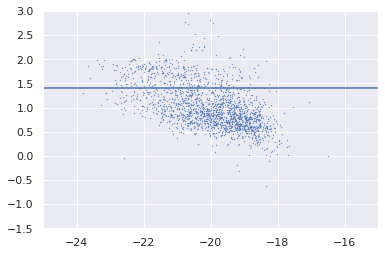

In [26]:
plt.scatter(r,u_r,s =0.1)
plt.ylim(-1.5,3)
plt.xlim(-25,-15)
plt.axhline(1.4,-25,25)

Text(0, 0.5, '$M_u-M_r$')

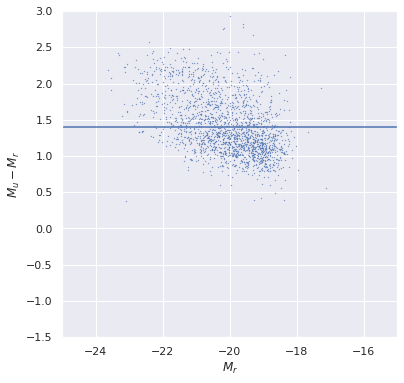

In [16]:
plt.figure(figsize = (6,6))
plt.scatter(r,u_r,s =0.1)
plt.ylim(-1.5,3)
plt.xlim(-25,-15)
plt.axhline(1.4,-25,25)
plt.xlabel("$M_r$")
plt.ylabel("$M_u-M_r$")

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,   2.,   3.,   6.,
         24.,  72., 114., 202., 229., 225., 169., 124., 138.,  92.,  91.,
         79.,  61.,  64.,  68.,  38.,  19.,  15.,   1.,   1.,   3.,   1.,
          1.]),
 array([-1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7, -0.6, -0.5,
        -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,
         0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,
         1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,
         2.9,  3. ]),
 <BarContainer object of 45 artists>)

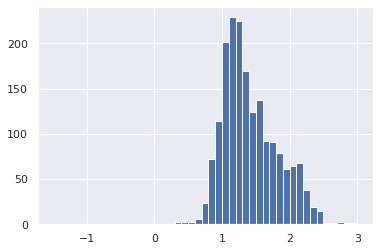

In [20]:
plt.hist(u_r,bins=45,range=[-1.5,3])

# WIDE

In [9]:
SED_Para = ['IDENT','SCALE_BEST','MOD_BEST','EXTLAW_BEST','EBV_BEST','CHI_BEST','NBAND_USED', \
            'AGE_BEST','AGE_INF','AGE_MED','AGE_SUP','MASS_BEST','MASS_INF','MASS_MED','MASS_SUP',\
            'SFR_BEST','SFR_INF','SFR_MED','SFR_SUP','SSFR_BEST','SSFR_INF','SSFR_MED','SSFR_SUP', \
            'B_OBS','V_OBS','R_OBS','I_OBS',\
            'ERR_B_OBS','ERR_V_OBS','ERR_R_OBS','ERR_I_OBS',\
            'B_MOD','V_MOD','R_MOD','I_MOD',\
            'CONTEXT','ZSPEC',\
            'B_ABS','V_ABS','R_ABS','I_ABS',\
            'Z_MAX']



wide = pd.read_table('/home/hygao/research/LePHARE/lephare_dev/zy_VVDS_wide_BVRI/VVDS_wide_BVRI.out',\
                              sep='\s+',skiprows=59,header=None,names=SED_Para,index_col=False)

In [10]:
zmax_wide = np.array(wide['Z_MAX'])
redshift_wide = np.array(wide['ZSPEC'])

In [11]:
redshift_wide.shape

(17501,)

In [11]:
cigale_wide = Table.read("/home/yunzheng/PAC/code/VVDS_desi/VVDS_SED_DEEP/wide_BVRI/out/results.fits")

In [12]:
cigale_wide.add_column(Column(name = 'zmax',length = len(zmax_wide),dtype = 'f8',data = zmax_wide))

In [13]:
wide_all = cigale_wide

In [27]:
wide_all   #17501

id,bayes.param.restframe_Lnu(DECam.g),bayes.param.restframe_Lnu(DECam.g)_err,bayes.param.restframe_Lnu(DECam.r),bayes.param.restframe_Lnu(DECam.r)_err,bayes.param.restframe_Lnu(sdss.gp),bayes.param.restframe_Lnu(sdss.gp)_err,bayes.param.restframe_Lnu(sdss.rp),bayes.param.restframe_Lnu(sdss.rp)_err,bayes.param.restframe_Lnu(sdss.up),bayes.param.restframe_Lnu(sdss.up)_err,bayes.param.restframe_Lnu(subaru.hsc.g),bayes.param.restframe_Lnu(subaru.hsc.g)_err,bayes.param.restframe_Lnu(subaru.hsc.r),bayes.param.restframe_Lnu(subaru.hsc.r)_err,bayes.stellar.m_star,bayes.stellar.m_star_err,bayes.subaru.hsc.g,bayes.subaru.hsc.g_err,bayes.subaru.hsc.r,bayes.subaru.hsc.r_err,best.chi_square,best.reduced_chi_square,best.attenuation.E_BVs.nebular.continuum_old,best.attenuation.E_BVs.nebular.continuum_young,best.attenuation.E_BVs.nebular.lines_old,best.attenuation.E_BVs.nebular.lines_young,best.attenuation.E_BVs.stellar.old,best.attenuation.E_BVs.stellar.young,best.attenuation.ebvs_old_factor,best.attenuation.powerlaw_slope,best.attenuation.subaru.hsc.g,best.attenuation.uv_bump_amplitude,best.attenuation.uv_bump_wavelength,best.attenuation.uv_bump_width,best.nebular.f_dust,best.nebular.f_esc,best.nebular.lines_width,best.nebular.logU,best.param.restframe_DECam.g-DECam.r,best.param.restframe_sdss.gp-sdss.rp,best.param.restframe_sdss.up-sdss.rp,best.param.restframe_subaru.hsc.g-subaru.hsc.r,best.sfh.age,best.sfh.age_burst,best.sfh.age_main,best.sfh.f_burst,best.sfh.tau_burst,best.sfh.tau_main,best.stellar.age_m_star,best.stellar.imf,best.stellar.metallicity,best.stellar.old_young_separation_age,best.universe.age,best.universe.luminosity_distance,best.universe.redshift,best.attenuation.nebular.continuum_old,best.attenuation.nebular.continuum_young,best.attenuation.nebular.lines_old,best.attenuation.nebular.lines_young,best.attenuation.stellar.old,best.attenuation.stellar.young,best.dust.luminosity,best.param.restframe_Lnu(DECam.g),best.param.restframe_Lnu(DECam.r),best.param.restframe_Lnu(sdss.gp),best.param.restframe_Lnu(sdss.rp),best.param.restframe_Lnu(sdss.up),best.param.restframe_Lnu(subaru.hsc.g),best.param.restframe_Lnu(subaru.hsc.r),best.sfh.integrated,best.sfh.sfr,best.sfh.sfr100Myrs,best.sfh.sfr10Myrs,best.stellar.lum,best.stellar.lum_ly,best.stellar.lum_ly_old,best.stellar.lum_ly_young,best.stellar.lum_old,best.stellar.lum_young,best.stellar.m_gas,best.stellar.m_gas_old,best.stellar.m_gas_young,best.stellar.m_star,best.stellar.m_star_old,best.stellar.m_star_young,best.stellar.n_ly,best.stellar.n_ly_old,best.stellar.n_ly_young,best.CFH12k_B,best.CFH12k_V,best.CFH12k_R,best.CFH12k_I,zmax
,W,W,W,W,W,W,W,W,W,W,W,W,W,W,solMass,solMass,mJy,mJy,mJy,mJy,,,mag,mag,mag,mag,mag,mag,,,mag,,nm,nm,,,km / s,,mag,mag,mag,mag,Myr,Myr,Myr,,Myr,Myr,Myr,,,Myr,Myr,m,,mag,mag,mag,mag,mag,mag,W,W,W,W,W,W,W,W,solMass,solMass / yr,solMass / yr,solMass / yr,W,W,W,W,W,W,solMass,solMass,solMass,solMass,solMass,solMass,ph / s,ph / s,ph / s,mJy,mJy,mJy,mJy,
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0,2.2494472077999087e+21,4.7345373266468425e+20,3.4011916605296696e+21,7.634790556207248e+20,2.220349869134773e+21,5.4928711904513576e+20,3.3810893227937513e+21,8.78649569522077e+20,1.3739039497705352e+21,9.984777550569489e+20,2.241975081922542e+21,4.8574829216834847e+20,3.25

# ALL

## 小于10 仅仅用deep

In [15]:
index = ((deep_all['SSR']>0)&(deep_all['TSR']>0))
deep_all = deep_all[index]
z = z[index]

In [76]:
deep_all['SSR']   #8087

0.925026
0.875241
0.91372
0.875241
0.87088
0.933031
0.933031
0.979877
0.979877
0.991275
0.91372


In [25]:
u = deep_all['bayes.param.restframe_Lnu(sdss.up)']
r = deep_all['bayes.param.restframe_Lnu(sdss.rp)']
u_r = -2.5 * np.log10(u/r)
mass = deep_all['bayes.stellar.m_star']
mass = np.log10(mass)

zmax = deep_all['zmax']
redshift = deep_all['Z']

# wei_all = (1/ cigale_new['TSR']) * (1/cigale_new['SSR']) * (1/cigale_new['W129'])
wei_all = (1/ deep_all['TSR']) * (1/deep_all['SSR']) 

In [26]:
index = (z>0)
mass = mass[index]
u_r = u_r[index]
zmax = zmax[index]
# zmax[(zmax>0.5)]=0.5
redshift = redshift[index]
wei = wei_all[index]

## 0.3-0.5

In [18]:
index = ((redshift<=0.5)&(redshift>=0.3))
mass = mass[index]
u_r = u_r[index]
zmax = zmax[index]
zmax[(zmax>0.5)]=0.5
redshift = redshift[index]
wei = wei[index]

In [32]:
np.unique(wei)

3.2211585594554144
3.2367791011812077
3.3190354183310142
3.411556760754993
3.5063728326232932
3.579016122869169
3.5963720429993518
3.6877667011178796
3.7905667869046846
3.9560091779412927
4.057549350435952


In [18]:
redshift

0.397
0.3849
0.4505
0.4209
0.3826
0.3012
0.305
0.4851
0.4838
0.3948
0.4016


In [19]:
V_0 = []
for i in range(len(zmax)):
    temp = cosmo.comoving_volume(zmax[i]) - cosmo.comoving_volume(0.3)
    V_0.append(temp.value)
    
V_1 = np.array(V_0)
# weight0 = Vtotal.value/ V_1
Vtotal = cosmo.comoving_volume(0.5) - cosmo.comoving_volume(0.3)
# Vtotal
weight0 = Vtotal.value/V_1

In [28]:
np.unique(weight0)

array([ 1.        ,  1.00164821,  1.00636623,  1.00639429,  1.00791862,
        1.01288218,  1.02108603,  1.02486645,  1.02730488,  1.02757316,
        1.02843677,  1.03013834,  1.03034953,  1.03121685,  1.03366474,
        1.03733554,  1.0388023 ,  1.05004037,  1.05215306,  1.0529367 ,
        1.05416678,  1.05575491,  1.06794266,  1.0690463 ,  1.0765261 ,
        1.08866228,  1.09001536,  1.09515753,  1.09823887,  1.10410159,
        1.10614578,  1.10665981,  1.10713339,  1.1149365 ,  1.11754326,
        1.12303673,  1.12573255,  1.12630318,  1.13603249,  1.13875277,
        1.15336585,  1.15745836,  1.15824805,  1.15961889,  1.16501309,
        1.16707183,  1.17534737,  1.18281793,  1.18315394,  1.18423566,
        1.18968644,  1.19008976,  1.19142963,  1.19203612,  1.20486897,
        1.21281338,  1.21329556,  1.21744928,  1.21975405,  1.22023112,
        1.2226784 ,  1.22556597,  1.23325519,  1.23405169,  1.23745096,
        1.24913565,  1.25295048,  1.25603385,  1.25971186,  1.27

In [20]:
wei_final = wei * weight0

In [21]:
weight0.shape

(995,)

Text(0.5, 1.0, '$VVDS \\ Redshift : 0.3 \\sim 0.5$')

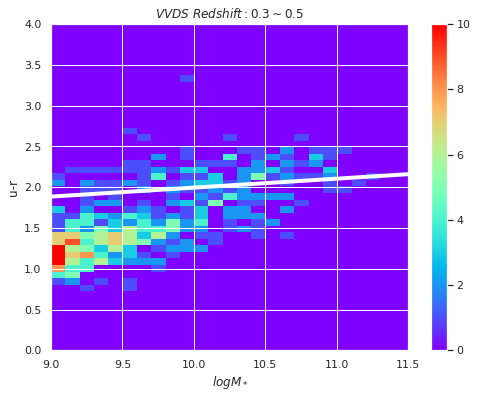

In [36]:
plt.figure(figsize = (8,6))
counts, xbins, ybins = np.histogram2d(mass, u_r,  bins=[30,50],range=[[9,12],[0,4]])
# print(xbins)
counts = counts.T
counts = counts[::-1]
# weight2 = counts / np.sum(counts,axis = 0)
# weight2[weight2==0]=np.nan
plt.imshow(counts,cmap='rainbow',extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],aspect='auto',vmax =10)
plt.colorbar()
# plt.plot([9.0,0.52796795083083],[10,0.5819679508308301],color = "red",linewidth = 2,label="cut")
# plt.plot([9.0,12.0],[0.52796795083083,0.6899679508308301],"white",linewidth = 2,label="cut")
plt.plot([9.0,12.0],[1.885,2.215],"-",color="white",linewidth = 4,label="cut")

plt.xlabel("$log M_*$")
plt.ylabel("u-r")
plt.xlim(9,11.5)
plt.ylim(0,4)
plt.title("$VVDS \ Redshift : 0.3 \sim 0.5$")
# plt.grid()
# plt.savefig("./vvds_number.pdf",dpi=100)
# plt.savefig("/home/yunzheng/PAC/picture/VVDS/u_r_weight.pdf",dpi = 100)

Text(0.5, 1.0, '$VVDS \\ Redshift : 0.3 \\sim 0.5$')

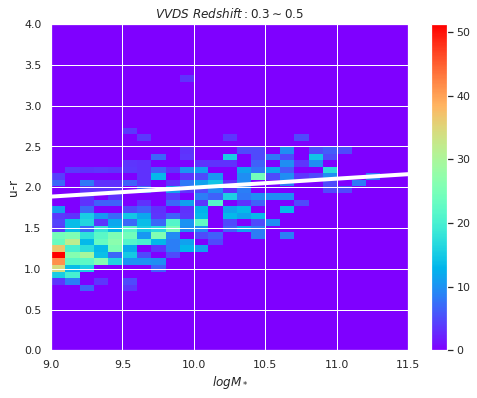

In [38]:
plt.figure(figsize = (8,6))
counts, xbins, ybins = np.histogram2d(mass, u_r,  bins=[30,50],range=[[9,12],[0,4]],weights = wei_final)
# print(xbins)
counts = counts.T
counts = counts[::-1]
# weight2 = counts / np.sum(counts,axis = 0)
# weight2[weight2==0]=np.nan
plt.imshow(counts,cmap='rainbow',extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],aspect='auto')
plt.colorbar()
# plt.plot([9.0,0.52796795083083],[10,0.5819679508308301],color = "red",linewidth = 2,label="cut")
# plt.plot([9.0,12.0],[0.52796795083083,0.6899679508308301],"white",linewidth = 2,label="cut")
plt.plot([9.0,12.0],[1.885,2.215],"-",color="white",linewidth = 4,label="cut")

plt.xlabel("$log M_*$")
plt.ylabel("u-r")
plt.xlim(9,11.5)
plt.ylim(0,4)
plt.title("$VVDS \ Redshift : 0.3 \sim 0.5$")
# plt.grid()
# plt.savefig("./vvds_number.pdf",dpi=100)
# plt.savefig("/home/yunzheng/PAC/picture/VVDS/u_r_weight.pdf",dpi = 100)

/tmp/ipykernel_378365/3369416510.py:6: RuntimeWarning: invalid value encountered in true_divide
  weight2 = counts / np.sum(counts,axis = 0)


Text(0.5, 1.0, '$VVDS \\ Redshift : 0.3 \\sim 0.5$')

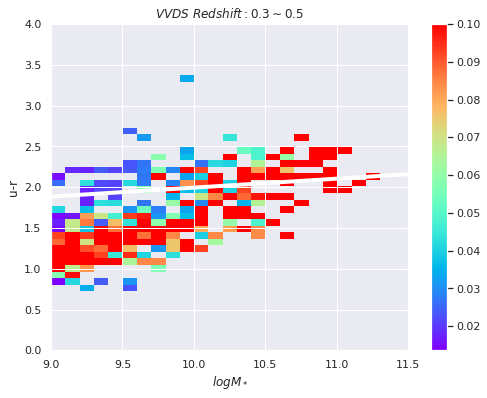

In [16]:
plt.figure(figsize = (8,6))
counts, xbins, ybins = np.histogram2d(mass, u_r,  bins=[30,50],range=[[9,12],[0,4]],weights = wei_final)
# print(xbins)
counts = counts.T
counts = counts[::-1]
weight2 = counts / np.sum(counts,axis = 0)
weight2[weight2==0]=np.nan
plt.imshow(weight2,cmap='rainbow',extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],aspect='auto',vmax=0.1)
plt.colorbar()
# plt.plot([9.0,0.52796795083083],[10,0.5819679508308301],color = "red",linewidth = 2,label="cut")
# plt.plot([9.0,12.0],[0.52796795083083,0.6899679508308301],"white",linewidth = 2,label="cut")
plt.plot([9.0,12.0],[1.885,2.215],"-",color="white",linewidth = 4,label="cut")

plt.xlabel("$log M_*$")
plt.ylabel("u-r")
plt.xlim(9,11.5)
plt.ylim(0,4)
plt.title("$VVDS \ Redshift : 0.3 \sim 0.5$")
# plt.grid()
# plt.savefig("./vvds_density.pdf",dpi=100)
# plt.savefig("/home/yunzheng/PAC/picture/VVDS/u_r_weight.pdf",dpi = 100)

In [50]:
weight1 = wei_final
massbin = np.array([9.0,9.5,10.0,10.5,11])
All = np.zeros(4)
up = np.zeros(4)
down = np.zeros(4)
frac = np.zeros(4)
for i in range(len(massbin)-1):
    index = ((mass>=massbin[i])&(mass<massbin[i+1])&(u_r>=0.0)&(u_r<=4.0))
    All[i] = np.sum(weight1[index])
    print("The length of All:",len(weight1[index]))
    print(All[i])
    cut = ((u_r[index]-(0.11 * mass[index] - 0.45 * 0.1 + 0.94))>0)
    up[i] = np.sum(weight1[index][cut])
    print("The length of up:",len(weight1[index][cut]))
    print(up[i])
    down[i] = np.sum(weight1[index][~cut])
    print("The length of down:",len(weight1[index][~cut]))
    print(down[i])

The length of All: 256
957.5084487571958
The length of up: 13
45.87825432781191
The length of down: 243
911.6301944293839
The length of All: 148
601.4182408587598
The length of up: 29
99.07490580046405
The length of down: 119
502.3433350582957
The length of All: 99
470.60691159852405
The length of up: 38
158.61944699748614
The length of down: 61
311.98746460103797
The length of All: 44
221.85056376681274
The length of up: 31
148.17255959350368
The length of down: 13
73.67800417330906


In [55]:
weight1[index][0]

3.5963720429993518

In [57]:
frac = np.zeros(2000)
for i in range(2000):
    temp = np.random.choice(44,size = 44 ,replace = True)
    all_temp = np.sum(weight1[index][temp])
    cut = ((u_r[index][temp]-(0.11 * mass[index][temp] - 0.45 * 0.1 + 0.94))>0)
    up_temp = np.sum(weight1[index][temp][cut])
    frac[i] = up_temp / all_temp

In [22]:
weight1 = wei_final
massbin = np.array([9.0,9.5,10.0,10.5,11])
All = np.zeros(4)
up = np.zeros(4)
down = np.zeros(4)
frac_all = np.zeros(4)
err_all = np.zeros(4)
for i in range(len(massbin)-1):
    print("the mass bin is:",(massbin[i],massbin[i+1]))
    index = ((mass>=massbin[i])&(mass<massbin[i+1])&(u_r>=0.0)&(u_r<=4.0))
    All[i] = np.sum(weight1[index])
    frac = np.zeros(5000)
    for j in range(5000):
        temp = np.random.choice(len(weight1[index]),size = len(weight1[index]) ,replace = True)
        all_temp = np.sum(weight1[index][temp])
        cut = ((u_r[index][temp]-(0.11 * mass[index][temp] - 0.45 * 0.1 + 0.94))>0)
        up_temp = np.sum(weight1[index][temp][cut])
        frac[j] = up_temp / all_temp
    frac_all[i] = np.mean(frac)
    err_all[i] = np.std(frac)

the mass bin is: (9.0, 9.5)
the mass bin is: (9.5, 10.0)
the mass bin is: (10.0, 10.5)
the mass bin is: (10.5, 11.0)


In [62]:
np.std?

Signature:
np.std(
    a,
    axis=None,
    dtype=None,
    out=None,
    ddof=0,
    keepdims=<no value>,
    *,
    where=<no value>,
)
Docstring:
Compute the standard deviation along the specified axis.

Returns the standard deviation, a measure of the spread of a distribution,
of the array elements. The standard deviation is computed for the
flattened array by default, otherwise over the specified axis.

Parameters
----------
a : array_like
    Calculate the standard deviation of these values.
axis : None or int or tuple of ints, optional
    Axis or axes along which the standard deviation is computed. The
    default is to compute the standard deviation of the flattened array.

    .. versionadded:: 1.7.0

    If this is a tuple of ints, a standard deviation is performed over
    multiple axes, instead of a single axis or all the axes as before.
dtype : dtype, optional
    Type to use in computing the standard deviation. For arrays of
    integer type the default is float64, for 

([<matplotlib.axis.YTick at 0x2b2101a46f10>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

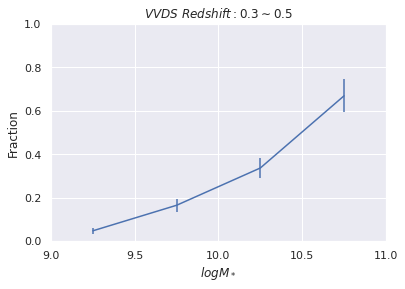

In [68]:
# frac = up / All
# up0 = up**2
# All0 = All**2
# bar = np.sqrt(up0/All0)
massbin_0 = 0.5 * (massbin[1:]+massbin[:-1])
plt.errorbar(massbin_0,frac_all,err_all)
plt.xlabel("$log M_*$")
plt.ylabel("Fraction")
plt.title("$VVDS \ Redshift : 0.3 \sim 0.5$")
plt.xticks(np.arange(9, 11.1, step=0.5))
plt.yticks(np.arange(0, 1.01, step=0.2))
# plt.savefig("./VVDS_frac.pdf",dpi=100)

In [25]:
frac

array([0.0479142 , 0.16473545, 0.33705295, 0.66789355])

In [23]:
frac_all

array([0.04555051, 0.17842307, 0.34391309, 0.67043049])

In [24]:
err_all

array([0.01364048, 0.03161173, 0.05080716, 0.07926364])

In [67]:
frac_all

array([0.04748602, 0.16498074, 0.33652718, 0.66868502])

## 0.5-0.7

In [27]:
index = ((redshift<=0.7)&(redshift>=0.5))
mass = mass[index]
u_r = u_r[index]
zmax = zmax[index]
zmax[(zmax>0.7)]=0.7
redshift = redshift[index]
wei = wei[index]

In [28]:
V_0 = []
for i in range(len(zmax)):
    temp = cosmo.comoving_volume(zmax[i]) - cosmo.comoving_volume(0.5)
    V_0.append(temp.value)
    
V_1 = np.array(V_0)
# weight0 = Vtotal.value/ V_1
Vtotal = cosmo.comoving_volume(0.7) - cosmo.comoving_volume(0.5)
# Vtotal
weight0 = Vtotal.value/V_1

In [29]:
wei_final = wei * weight0

In [98]:
wei_final

3.210717287683704
3.210717287683704
3.2116452737103396
14.341182475015769
3.262366750651432
3.5674148684371207
3.262366750651432
8.883783179687192
3.262366750651432
3.262366750651432
3.6248023758469654


Text(0.5, 1.0, '$VVDS \\ Redshift : 0.5 \\sim 0.7$')

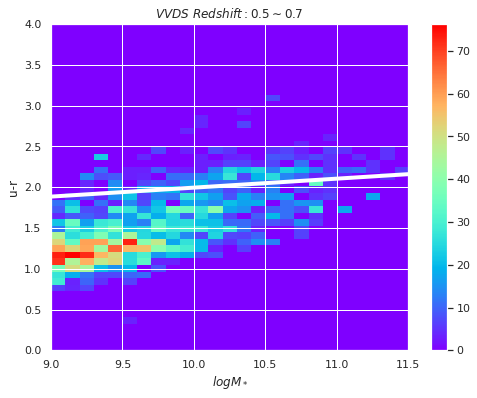

In [28]:
plt.figure(figsize = (8,6))
counts, xbins, ybins = np.histogram2d(mass, u_r,  bins=[30,50],range=[[9,12],[0,4]],weights = wei_final)
# print(xbins)
counts = counts.T
counts = counts[::-1]
# weight2 = counts / np.sum(counts,axis = 0)
# weight2[weight2==0]=np.nan
plt.imshow(counts,cmap='rainbow',extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],aspect='auto')
plt.colorbar()
# plt.plot([9.0,0.52796795083083],[10,0.5819679508308301],color = "red",linewidth = 2,label="cut")
# plt.plot([9.0,12.0],[0.52796795083083,0.6899679508308301],"white",linewidth = 2,label="cut")
plt.plot([9.0,12.0],[1.885,2.215],"-",color="white",linewidth = 4,label="cut")

plt.xlabel("$log M_*$")
plt.ylabel("u-r")
plt.xlim(9,11.5)
plt.ylim(0,4)
plt.title("$VVDS \ Redshift : 0.5 \sim 0.7$")
# plt.grid()
# plt.savefig("./vvds_number.pdf",dpi=100)
# plt.savefig("/home/yunzheng/PAC/picture/VVDS/u_r_weight.pdf",dpi = 100)

/tmp/ipykernel_378365/4134459825.py:6: RuntimeWarning: invalid value encountered in true_divide
  weight2 = counts / np.sum(counts,axis = 0)


Text(0.5, 1.0, '$VVDS \\ Redshift : 0.5 \\sim 0.7$')

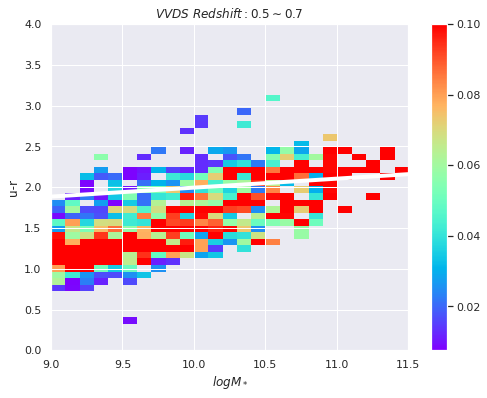

In [29]:
plt.figure(figsize = (8,6))
counts, xbins, ybins = np.histogram2d(mass, u_r,  bins=[30,50],range=[[9,12],[0,4]],weights = wei_final)
# print(xbins)
counts = counts.T
counts = counts[::-1]
weight2 = counts / np.sum(counts,axis = 0)
weight2[weight2==0]=np.nan
plt.imshow(weight2,cmap='rainbow',extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],aspect='auto',vmax=0.1)
plt.colorbar()
# plt.plot([9.0,0.52796795083083],[10,0.5819679508308301],color = "red",linewidth = 2,label="cut")
# plt.plot([9.0,12.0],[0.52796795083083,0.6899679508308301],"white",linewidth = 2,label="cut")
plt.plot([9.0,12.0],[1.885,2.215],"-",color="white",linewidth = 4,label="cut")

plt.xlabel("$log M_*$")
plt.ylabel("u-r")
plt.xlim(9,11.5)
plt.ylim(0,4)
plt.title("$VVDS \ Redshift : 0.5 \sim 0.7$")
# plt.grid()
# plt.savefig("./vvds_density.pdf",dpi=100)
# plt.savefig("/home/yunzheng/PAC/picture/VVDS/u_r_weight.pdf",dpi = 100)

In [99]:
weight1 = wei_final
massbin = np.array([9.0,9.5,10.0,10.5,11])
All = np.zeros(4)
up = np.zeros(4)
down = np.zeros(4)
frac = np.zeros(4)
for i in range(len(massbin)-1):
    index = ((mass>=massbin[i])&(mass<massbin[i+1])&(u_r>=0.0)&(u_r<=4.0))
    All[i] = np.sum(weight1[index])
    print("The length of All:",len(weight1[index]))
    print(All[i])
    cut = ((u_r[index]-(0.11 * mass[index] - 0.45 * 0.1 + 0.94))>0)
    up[i] = np.sum(weight1[index][cut])
    print("The length of up:",len(weight1[index][cut]))
    print(up[i])
    down[i] = np.sum(weight1[index][~cut])
    print("The length of down:",len(weight1[index][~cut]))
    print(down[i])

The length of All: 489
1827.6144790429285
The length of up: 11
49.77132049273502
The length of down: 478
1777.8431585501935
The length of All: 382
1394.2675946368158
The length of up: 33
114.85547161361714
The length of down: 349
1279.412123023199
The length of All: 230
857.0921227130863
The length of up: 72
248.55616274864224
The length of down: 158
608.5359599644439
The length of All: 106
449.4111017800794
The length of up: 50
184.29168419260466
The length of down: 56
265.11941758747463


In [30]:
weight1 = wei_final
massbin = np.array([9.0,9.5,10.0,10.5,11])
All = np.zeros(4)
up = np.zeros(4)
down = np.zeros(4)
frac_all = np.zeros(4)
err_all = np.zeros(4)
for i in range(len(massbin)-1):
    print("the mass bin is:",(massbin[i],massbin[i+1]))
    index = ((mass>=massbin[i])&(mass<massbin[i+1])&(u_r>=0.0)&(u_r<=4.0))
    All[i] = np.sum(weight1[index])
    frac = np.zeros(5000)
    for j in range(5000):
        temp = np.random.choice(len(weight1[index]),size = len(weight1[index]) ,replace = True)
        all_temp = np.sum(weight1[index][temp])
        cut = ((u_r[index][temp]-(0.11 * mass[index][temp] - 0.45 * 0.1 + 0.94))>0)
        up_temp = np.sum(weight1[index][temp][cut])
        frac[j] = up_temp / all_temp
    frac_all[i] = np.mean(frac)
    err_all[i] = np.std(frac)

the mass bin is: (9.0, 9.5)
the mass bin is: (9.5, 10.0)
the mass bin is: (10.0, 10.5)
the mass bin is: (10.5, 11.0)


([<matplotlib.axis.YTick at 0x2b2101a975b0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

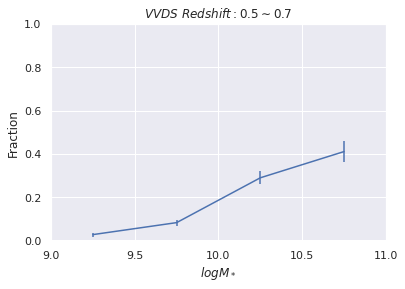

In [101]:
# frac = up / All
# up0 = up**2
# All0 = All**2
# bar = np.sqrt(up0/All0)
# massbin_0 = 0.5 * (massbin[1:]+massbin[:-1])
plt.errorbar(massbin_0,frac_all,err_all)
plt.xlabel("$log M_*$")
plt.ylabel("Fraction")
plt.title("$VVDS \ Redshift : 0.5 \sim 0.7$")
plt.xticks(np.arange(9, 11.1, step=0.5))
plt.yticks(np.arange(0, 1.01, step=0.2))
# plt.savefig("./VVDS_frac.pdf",dpi=100)

In [34]:
frac

array([0.04758   , 0.08864424, 0.28827137, 0.42611817])

In [31]:
frac_all

array([0.02716305, 0.08275808, 0.29001247, 0.40932614])

In [32]:
err_all

array([0.00886982, 0.01377739, 0.02944836, 0.04740726])

In [20]:
cigale = vstack((cigale_deep,cigale_wide))

In [21]:
cigale   #21185

id,bayes.param.restframe_Lnu(sdss.gp),bayes.param.restframe_Lnu(sdss.gp)_err,bayes.param.restframe_Lnu(sdss.rp),bayes.param.restframe_Lnu(sdss.rp)_err,bayes.param.restframe_Lnu(sdss.up),bayes.param.restframe_Lnu(sdss.up)_err,bayes.stellar.m_star,bayes.stellar.m_star_err,bayes.subaru.hsc.g,bayes.subaru.hsc.g_err,bayes.subaru.hsc.r,bayes.subaru.hsc.r_err,best.chi_square,best.reduced_chi_square,best.attenuation.E_BVs.nebular.continuum_old,best.attenuation.E_BVs.nebular.continuum_young,best.attenuation.E_BVs.nebular.lines_old,best.attenuation.E_BVs.nebular.lines_young,best.attenuation.E_BVs.stellar.old,best.attenuation.E_BVs.stellar.young,best.attenuation.ebvs_old_factor,best.attenuation.powerlaw_slope,best.attenuation.subaru.hsc.g,best.attenuation.uv_bump_amplitude,best.attenuation.uv_bump_wavelength,best.attenuation.uv_bump_width,best.nebular.f_dust,best.nebular.f_esc,best.nebular.lines_width,best.nebular.logU,best.param.restframe_DECam.g-DECam.r,best.param.restframe_sdss.gp-sdss.rp,best.param.restframe_sdss.up-sdss.rp,best.param.restframe_subaru.hsc.g-subaru.hsc.r,best.sfh.age,best.sfh.age_burst,best.sfh.age_main,best.sfh.f_burst,best.sfh.tau_burst,best.sfh.tau_main,best.stellar.age_m_star,best.stellar.imf,best.stellar.metallicity,best.stellar.old_young_separation_age,best.universe.age,best.universe.luminosity_distance,best.universe.redshift,best.attenuation.nebular.continuum_old,best.attenuation.nebular.continuum_young,best.attenuation.nebular.lines_old,best.attenuation.nebular.lines_young,best.attenuation.stellar.old,best.attenuation.stellar.young,best.dust.luminosity,best.param.restframe_Lnu(DECam.g),best.param.restframe_Lnu(DECam.r),best.param.restframe_Lnu(sdss.gp),best.param.restframe_Lnu(sdss.rp),best.param.restframe_Lnu(sdss.up),best.param.restframe_Lnu(subaru.hsc.g),best.param.restframe_Lnu(subaru.hsc.r),best.sfh.integrated,best.sfh.sfr,best.sfh.sfr100Myrs,best.sfh.sfr10Myrs,best.stellar.lum,best.stellar.lum_ly,best.stellar.lum_ly_old,best.stellar.lum_ly_young,best.stellar.lum_old,best.stellar.lum_young,best.stellar.m_gas,best.stellar.m_gas_old,best.stellar.m_gas_young,best.stellar.m_star,best.stellar.m_star_old,best.stellar.m_star_young,best.stellar.n_ly,best.stellar.n_ly_old,best.stellar.n_ly_young,best.CFH12k_I,best.DECam.g,best.DECam.r,best.DECam.z
,W,W,W,W,W,W,solMass,solMass,mJy,mJy,mJy,mJy,,,mag,mag,mag,mag,mag,mag,,,mag,,nm,nm,,,km / s,,mag,mag,mag,mag,Myr,Myr,Myr,,Myr,Myr,Myr,,,Myr,Myr,m,,mag,mag,mag,mag,mag,mag,W,W,W,W,W,W,W,W,solMass,solMass / yr,solMass / yr,solMass / yr,W,W,W,W,W,W,solMass,solMass,solMass,solMass,solMass,solMass,ph / s,ph / s,ph / s,mJy,mJy,mJy,mJy
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0,1.0891512539950048e+22,2.0649020686145765e+21,1.6233320225939881e+22,5.050694686244061e+21,3.8454605813933146e+21,2.4964620083122844e+20,15759766124.047277,15103612657.843248,0.000380578697528113,7.098568882843133e-05,0.0005759965022287625,4.799375251701464e-05,0.14811312292702322,0.04937104097567441,0.0,0.0,0.0,0.0,0.0,0.0,0.33,0.0,-0.0,0.0,217.5,35.0,0.0,0.0,300.0,-3.0,0.709717050554757,0.732299027404255,2.1872164135226773,0.6684901182712581,4500.0,5.0,4500.0,0.0,5.0,631.0,3240.1246471079235,1.0,0.05,10.0,5326.463795053285,2.5122990309937633e+26,1.1714,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,1.5869986091384793e+22,3.051148647549313e+22,1.4760041343243885e+22,2.89739152143121e+22,3.8

In [22]:
u = cigale['bayes.param.restframe_Lnu(sdss.up)']
r = cigale['bayes.param.restframe_Lnu(sdss.rp)']
u_r = -2.5 * np.log10(u/r)
mass = cigale['bayes.stellar.m_star']
mass = np.log10(mass)
zmax = np.hstack([zmax_deep,zmax_wide])
redshift = np.hstack([redshift_deep,redshift_wide])

In [23]:
np.min(mass)

4.372038350650477

In [24]:
index = ((redshift<=0.5)&(redshift>=0.3))
mass = mass[index]
u_r = u_r[index]
zmax = zmax[index]
redshift = redshift[index]

In [28]:
index = (zmax>0.3)
mass = mass[index]
zmax = zmax[index]
u_r = u_r[index]

index = (zmax>0.5)
zmax[index] = 0.5

In [31]:
u_r.shape

(4400,)

In [32]:
V_0 = []
for i in range(len(zmax)):
    temp = cosmo.comoving_volume(zmax[i]) - cosmo.comoving_volume(0.3)
    V_0.append(temp.value)
    
V_1 = np.array(V_0)
# weight0 = Vtotal.value/ V_1
Vtotal = cosmo.comoving_volume(0.5) - cosmo.comoving_volume(0.3)
# Vtotal
weight0 = Vtotal.value/V_1

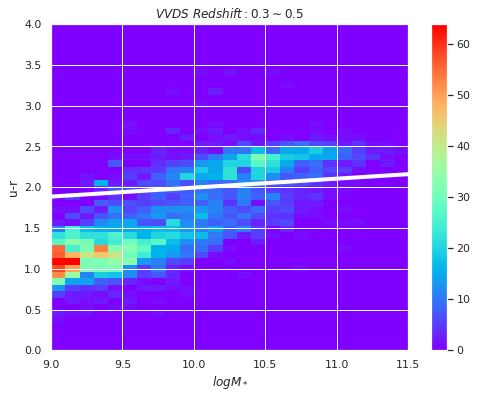

In [37]:
plt.figure(figsize = (8,6))
counts, xbins, ybins = np.histogram2d(mass, u_r,  bins=[30,50],range=[[9,12],[0,4]],weights = weight0)
# print(xbins)
counts = counts.T
counts = counts[::-1]
# weight2 = counts / np.sum(counts,axis = 0)
# weight2[weight2==0]=np.nan
plt.imshow(counts,cmap='rainbow',extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],aspect='auto')
plt.colorbar()
# plt.plot([9.0,0.52796795083083],[10,0.5819679508308301],color = "red",linewidth = 2,label="cut")
# plt.plot([9.0,12.0],[0.52796795083083,0.6899679508308301],"white",linewidth = 2,label="cut")
plt.plot([9.0,12.0],[1.885,2.215],"-",color="white",linewidth = 4,label="cut")

plt.xlabel("$log M_*$")
plt.ylabel("u-r")
plt.xlim(9,11.5)
plt.ylim(0,4)
plt.title("$VVDS \ Redshift : 0.3 \sim 0.5$")
# plt.grid()
plt.savefig("./vvds_number.pdf",dpi=100)
# plt.savefig("/home/yunzheng/PAC/picture/VVDS/u_r_weight.pdf",dpi = 100)

/tmp/ipykernel_402038/3420195833.py:6: RuntimeWarning: invalid value encountered in true_divide
  weight2 = counts / np.sum(counts,axis = 0)


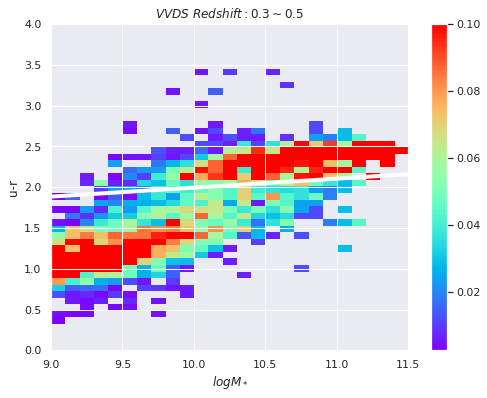

In [40]:
plt.figure(figsize = (8,6))
counts, xbins, ybins = np.histogram2d(mass, u_r,  bins=[30,50],range=[[9,12],[0,4]],weights = weight0)
# print(xbins)
counts = counts.T
counts = counts[::-1]
weight2 = counts / np.sum(counts,axis = 0)
weight2[weight2==0]=np.nan
plt.imshow(weight2,cmap='rainbow',extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],aspect='auto',vmax=0.1)
plt.colorbar()
# plt.plot([9.0,0.52796795083083],[10,0.5819679508308301],color = "red",linewidth = 2,label="cut")
# plt.plot([9.0,12.0],[0.52796795083083,0.6899679508308301],"white",linewidth = 2,label="cut")
plt.plot([9.0,12.0],[1.885,2.215],"-",color="white",linewidth = 4,label="cut")

plt.xlabel("$log M_*$")
plt.ylabel("u-r")
plt.xlim(9,11.5)
plt.ylim(0,4)
plt.title("$VVDS \ Redshift : 0.3 \sim 0.5$")
# plt.grid()
plt.savefig("./vvds_density.pdf",dpi=100)
# plt.savefig("/home/yunzheng/PAC/picture/VVDS/u_r_weight.pdf",dpi = 100)

In [41]:
np.save("./VVDS_3_5.npy",np.array([mass,u_r,weight0]))

In [44]:
weight1 = weight0
massbin = np.array([9.0,9.5,10.0,10.5,11])
All = np.zeros(4)
up = np.zeros(4)
down = np.zeros(4)
frac = np.zeros(4)
for i in range(len(massbin)-1):
    index = ((mass>=massbin[i])&(mass<massbin[i+1])&(u_r>=0.0)&(u_r<=4.0))
    All[i] = np.sum(weight1[index])
    print("The length of All:",len(weight1[index]))
    print(All[i])
    cut = ((u_r[index]-(0.11 * mass[index] - 0.45 * 0.1 + 0.94))>0)
    up[i] = np.sum(weight1[index][cut])
    print("The length of up:",len(weight1[index][cut]))
    print(up[i])
    down[i] = np.sum(weight1[index][~cut])
    print("The length of down:",len(weight1[index][~cut]))
    print(down[i])

The length of All: 1228
1607.9946148244949
The length of up: 11
35.04338738426488
The length of down: 1217
1572.95122744023
The length of All: 994
1025.8739886198623
The length of up: 136
160.59948805289605
The length of down: 858
865.2745005669664
The length of All: 860
862.6186683745952
The length of up: 457
459.59316606931645
The length of down: 403
403.0255023052787
The length of All: 473
473.0
The length of up: 355
355.0
The length of down: 118
118.0


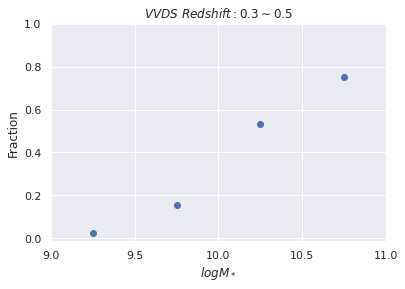

In [46]:
frac = up / All
massbin_0 = 0.5 * (massbin[1:]+massbin[:-1])
plt.scatter(massbin_0,frac)
plt.xlabel("$log M_*$")
plt.ylabel("Fraction")
plt.title("$VVDS \ Redshift : 0.3 \sim 0.5$")
plt.xticks(np.arange(9, 11.1, step=0.5))
plt.yticks(np.arange(0, 1.01, step=0.2))
plt.savefig("./VVDS_frac.pdf",dpi=100)